In [60]:
import os
import pandas as pd
import numpy as np
import networkx as nx

In [36]:
path = os.getcwd()
df = pd.read_csv(path+'\\data\\data_example.csv')
df = df.drop(df.columns[0],axis=1)
df.head(5)

,block_timestamp,from_address,to_address,value,from_address_type,to_address_type
0,2021-09-24 01:01:04 UTC,0x1c26d94a07b820b759581792a2eaff2fde3d250f,0x018d5c4783f5317815f6e8168942a12adde3cd3c,0.000000,EOA,Contract
1,2021-09-24 03:38:42 UTC,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538,EOA,EOA
2,2021-09-24 04:37:14 UTC,0x14631c27771e7021fe4093a67b9a90353d64e951,0x07a13eea351d501cfedf96bda8528bbc71ca5d80,0.050000,EOA,Contract
3,2021-09-24 06:34:41 UTC,0xd5a06ac60905636f8c66f8ea1c662a1bfa2af9d1,0x0ee0cb563a52ae1170ac34fbb94c50e89adde4bd,0.000000,EOA,Contract
4,2021-09-24 09:23:45 UTC,0x6e551048cb8f6f94632206a25628807d76432126,0x0000000089341e263b85d84a0eea39f47c37a9d2,0.000000,EOA,Contract


In [57]:
userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
contractSpace = df[(df.from_address_type == 'Contract') & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | ((df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]

In [70]:
userSpace = userSpace[['from_address','to_address','value']]
userSpace.head()

,from_address,to_address,value
1,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538
5,0x50e7b0f8b2811a7877191c3d2be56bc191772601,0x8951f25adcc7c3256dd9b521ed726fb587a46d52,0.048131
7,0x8fa6521bd55c981b27cc7dae33754dee86125e0a,0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2,0.013084
16,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5,0.025541
23,0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb,0x4f6742badb049791cd9a37ea913f2bac38d01279,2.044882


In [61]:
G = nx.from_pandas_edgelist(userSpace,                # the df containing the data
                            source='from_address',        # first element of the dyad
                            target='to_address',        # second element of the dyad
                            edge_attr='value')# weight

In [69]:
G?

Type:           Graph
String form:    Graph with 52 nodes and 38 edges
Length:         52
File:           c:\users\mattheus\anaconda3\envs\smm638\lib\site-packages\networkx\classes\graph.py
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, NumPy matrix
    or 2d ndarray, SciPy sparse matrix, or 

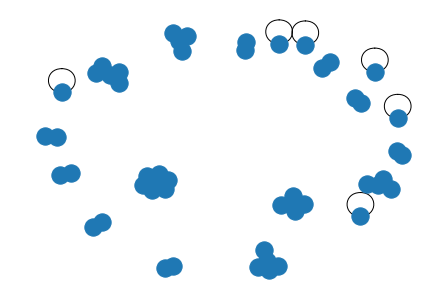

In [64]:
nx.draw(G)